In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook
import sys

# ACDC utils
sys.path.append('/workspace/DQTools')
from utils import *

/opt/tljh/user/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Assimila Change Detection for Coastlines - ACDC

### Get data using DQManager - data processed on the server side
- The client needs to access the server where the Data Cube is installed via SSH or Jupyter Notebooks
- Multiprocessing is possible using [DASK](https://dask.org/)

In [2]:
# Set request parameters
product = 'S1_GRD'
subproduct = ['VH_asc']
tile = 'OS'

start = dt.datetime(2020, 1, 10)
stop = dt.datetime(2020, 12, 31)

ds = get_data(product, subproduct, start, stop, tile)

In [3]:
ds

[<xarray.Dataset>
 Dimensions:    (latitude: 3910, longitude: 12598, time: 60)
 Coordinates:
   * latitude   (latitude) float64 5.887e+06 5.887e+06 ... 5.848e+06 5.848e+06
   * longitude  (longitude) float64 6.676e+05 6.676e+05 ... 7.935e+05 7.935e+05
   * time       (time) datetime64[ns] 2020-01-10 2020-01-10 ... 2020-12-23
 Data variables:
     VH_asc     (time, latitude, longitude) float32 dask.array<shape=(60, 3910, 12598), chunksize=(4, 251, 256)>
 Attributes:
     transform:      [667560.0, 10.0, 0.0, 5886640.0, 0.0, -10.0]
     crs:            +init=epsg:32630
     res:            (10.0, 10.0)
     is_tiled:       1
     AREA_OR_POINT:  Area
     last_gold:      2020
     product:        S1_GRD
     version:        S1_GRD]

In [4]:
# Get Dataset into a DataArray variable
vh_asc = ds[0].VH_asc

In [5]:
vh_asc

<xarray.DataArray 'VH_asc' (time: 60, latitude: 3910, longitude: 12598)>
dask.array<shape=(60, 3910, 12598), dtype=float32, chunksize=(4, 251, 256)>
Coordinates:
  * latitude   (latitude) float64 5.887e+06 5.887e+06 ... 5.848e+06 5.848e+06
  * longitude  (longitude) float64 6.676e+05 6.676e+05 ... 7.935e+05 7.935e+05
  * time       (time) datetime64[ns] 2020-01-10 2020-01-10 ... 2020-12-23
Attributes:
    transform:      [667560.0, 10.0, 0.0, 5886640.0, 0.0, -10.0]
    crs:            +init=epsg:32630
    res:            (10.0, 10.0)
    is_tiled:       1
    AREA_OR_POINT:  Area
    last_gold:      2020
    product:        S1_GRD
    version:        S1_GRD

<IPython.core.display.Javascript object>


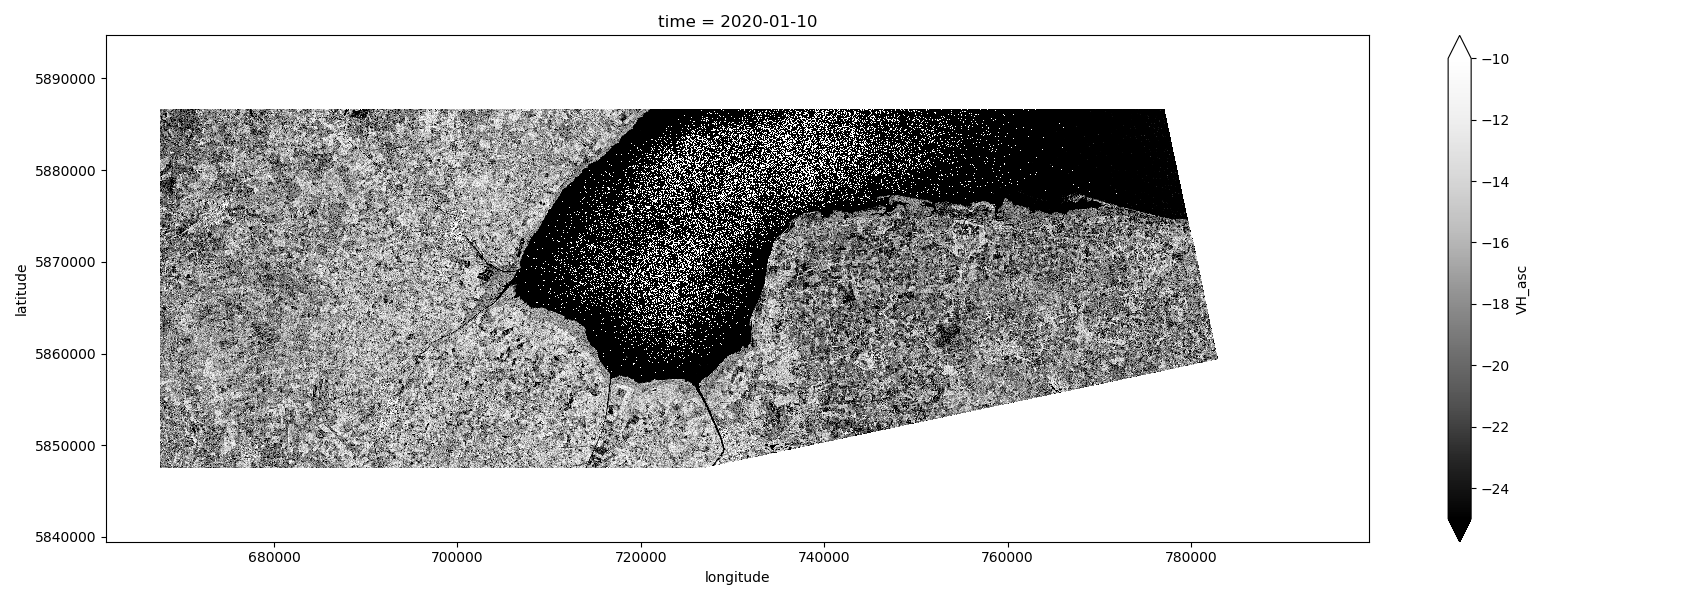

In [6]:
# Plot the nir band data
fig, cx = plt.subplots(figsize=(17,6))

vh_asc[1].plot.imshow(ax=cx, cmap='Greys_r', vmin=-25, vmax=-10)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Create temporal composite

In [ ]:
# Create monthly composite
monthly_mean_vh_asc = vh_asc.resample(time='1MS').mean('time')
# Copy attributes
monthly_mean_vh_asc.attrs = vh_asc.attrs

monthly_mean_vh_asc

In [ ]:
# Plot the VH ascending data for June 2020
fig, cx = plt.subplots(figsize=(17,6))

monthly_mean_vh_asc[5].plot.imshow(ax=cx, cmap='Greys_r', vmin=-25, vmax=-5)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Create multi-temporal VH ascending RGB image

In [ ]:
# Months 0 -11
red = monthly_mean_vh_asc[3]
green = monthly_mean_vh_asc[5]
blue = monthly_mean_vh_asc[9]

# Create an RGB stack
rgb = create_rgb(red, green, blue, vmin=-25, vmax=-5)
